In [425]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, GridSearchCV

# 1. Read Files

In [233]:
#import data
df = pd.read_csv('Data/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [234]:
#check data
df.shape

(7043, 21)

In [235]:
#check head
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [236]:
#describe
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [237]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [238]:
df['customerID'].nunique()

7043

In [239]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [240]:
df['TotalCharges']

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object

In [241]:
cat = 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService','MultipleLines',\
'InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV',\
'StreamingMovies', 'Contract', 'PaperlessBilling','PaymentMethod', 'Churn'

In [242]:
num = ['tenure','MonthlyCharges','TotalCharges']

In [243]:
for i in cat:
    print(i)
    print(df[i].value_counts(),'\n')

gender
Male      3555
Female    3488
Name: gender, dtype: int64 

SeniorCitizen
0    5901
1    1142
Name: SeniorCitizen, dtype: int64 

Partner
No     3641
Yes    3402
Name: Partner, dtype: int64 

Dependents
No     4933
Yes    2110
Name: Dependents, dtype: int64 

PhoneService
Yes    6361
No      682
Name: PhoneService, dtype: int64 

MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64 

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64 

OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64 

OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64 

DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64 

TechSupport
No 

In [244]:
#null values
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [245]:
#check the target column
df['Churn'].value_counts(normalize=True)

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64

# 2. Preprocessing

## 2.1 Change dtype

In [246]:
#changing astype of TotalCharges
df[df['TotalCharges']==' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [247]:
df['TotalCharges'].replace(' ', 0, inplace=True)

In [248]:
df[df['TotalCharges']==' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [249]:
df['TotalCharges'] = df['TotalCharges'].astype('float64')

## 2.2 Encodings

In [250]:
df.replace('No phone service','No', inplace=True)
df.replace('No internet service','No', inplace=True)

In [251]:
for i in cat:
    print(i)
    print(df[i].value_counts(),'\n')

gender
Male      3555
Female    3488
Name: gender, dtype: int64 

SeniorCitizen
0    5901
1    1142
Name: SeniorCitizen, dtype: int64 

Partner
No     3641
Yes    3402
Name: Partner, dtype: int64 

Dependents
No     4933
Yes    2110
Name: Dependents, dtype: int64 

PhoneService
Yes    6361
No      682
Name: PhoneService, dtype: int64 

MultipleLines
No     4072
Yes    2971
Name: MultipleLines, dtype: int64 

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64 

OnlineSecurity
No     5024
Yes    2019
Name: OnlineSecurity, dtype: int64 

OnlineBackup
No     4614
Yes    2429
Name: OnlineBackup, dtype: int64 

DeviceProtection
No     4621
Yes    2422
Name: DeviceProtection, dtype: int64 

TechSupport
No     4999
Yes    2044
Name: TechSupport, dtype: int64 

StreamingTV
No     4336
Yes    2707
Name: StreamingTV, dtype: int64 

StreamingMovies
No     4311
Yes    2732
Name: StreamingMovies, dtype: int64 

Contract
Month-to-month    3

In [252]:
#convert yes to 1 and no to 0
category_convert = {'No': 0, 'Yes': 1}

In [253]:
df.replace(category_convert, inplace=True)

In [254]:
#convert gender
df['gender'].replace({'Male':1, 'Female':0}, inplace=True)

In [255]:
#We have converted yes to 1 and no to 0, for binary categorization
for i in cat:
    print(i)
    print(df[i].value_counts(),'\n')

gender
1    3555
0    3488
Name: gender, dtype: int64 

SeniorCitizen
0    5901
1    1142
Name: SeniorCitizen, dtype: int64 

Partner
0    3641
1    3402
Name: Partner, dtype: int64 

Dependents
0    4933
1    2110
Name: Dependents, dtype: int64 

PhoneService
1    6361
0     682
Name: PhoneService, dtype: int64 

MultipleLines
0    4072
1    2971
Name: MultipleLines, dtype: int64 

InternetService
Fiber optic    3096
DSL            2421
0              1526
Name: InternetService, dtype: int64 

OnlineSecurity
0    5024
1    2019
Name: OnlineSecurity, dtype: int64 

OnlineBackup
0    4614
1    2429
Name: OnlineBackup, dtype: int64 

DeviceProtection
0    4621
1    2422
Name: DeviceProtection, dtype: int64 

TechSupport
0    4999
1    2044
Name: TechSupport, dtype: int64 

StreamingTV
0    4336
1    2707
Name: StreamingTV, dtype: int64 

StreamingMovies
0    4311
1    2732
Name: StreamingMovies, dtype: int64 

Contract
Month-to-month    3875
Two year          1695
One year          1473


In [256]:
#one hot encoding
ohe_cols = ['PaymentMethod','Contract','InternetService']

In [257]:
df = pd.get_dummies(df, prefix= ohe_cols, columns= ohe_cols, drop_first=True)

In [258]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,MonthlyCharges,TotalCharges,Churn,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_One year,Contract_Two year,InternetService_DSL,InternetService_Fiber optic
0,7590-VHVEG,0,0,1,0,1,0,0,0,1,...,29.85,29.85,0,0,1,0,0,0,1,0
1,5575-GNVDE,1,0,0,0,34,1,0,1,0,...,56.95,1889.50,0,0,0,1,1,0,1,0
2,3668-QPYBK,1,0,0,0,2,1,0,1,1,...,53.85,108.15,1,0,0,1,0,0,1,0
3,7795-CFOCW,1,0,0,0,45,0,0,1,0,...,42.30,1840.75,0,0,0,0,1,0,1,0
4,9237-HQITU,0,0,0,0,2,1,0,0,0,...,70.70,151.65,1,0,1,0,0,0,0,1


## 2.3 Scaling

In [82]:
scaler = StandardScaler()

In [91]:
scaler.fit(df[num])

StandardScaler()

In [92]:
df_scale_num = pd.DataFrame(scaler.transform(df[num]), columns=num)

In [93]:
df_scale_not_num = df.drop(columns=num, axis=1)

In [94]:
df_model = pd.concat([df_scale_num, df_scale_not_num], axis= 1)

In [95]:
df_model.shape

(7043, 25)

## 2.4 Drop Columns

In [327]:
df_model = df.copy()

In [328]:
df_model.drop(columns='customerID', inplace=True)

In [329]:
df[['MonthlyCharges','TotalCharges','tenure']]

,MonthlyCharges,TotalCharges,tenure
0,29.85,29.85,1
1,56.95,1889.50,34
2,53.85,108.15,2
3,42.30,1840.75,45
4,70.70,151.65,2
...,...,...,...
7038,84.80,1990.50,24
7039,103.20,7362.90,72
7040,29.60,346.45,11
7041,74.40,306.60,4


<AxesSubplot: >

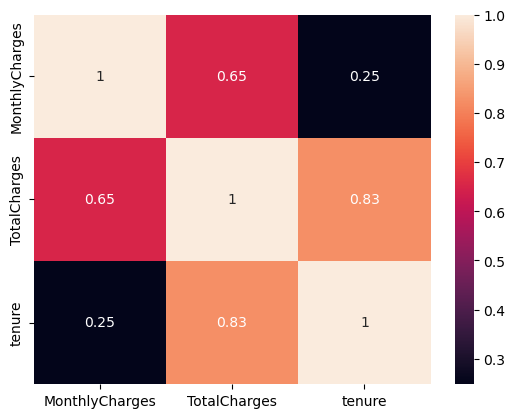

In [330]:
sns.heatmap(df[['MonthlyCharges','TotalCharges','tenure']].corr(), annot=True)

# 3. Model Building

In [395]:
def eval(y_train, y_train_pred, y_val, y_val_pred):
    print(f'Accuracy on training data:\t {accuracy_score(y_train, y_train_pred)}')
    print(f'Accuracy on test data:\t {accuracy_score(y_val, y_val_pred)} \n')
    
    print(f'Precision on training data:\t {precision_score(y_train, y_train_pred)}')
    print(f'Precision on test data:\t {precision_score(y_val, y_val_pred)} \n')
    
    print(f'Recall on training data:\t {recall_score(y_train, y_train_pred)}')
    print(f'Recall on test data:\t {recall_score(y_val, y_val_pred)} \n')
    
    print(f'F1 score on training data:\t {f1_score(y_train, y_train_pred)}')
    print(f'F1 score on test data:\t {f1_score(y_val, y_val_pred)} \n')

In [357]:
#set X and y
X = df_model.drop(['Churn'], axis=1)
y = df_model['Churn']

In [358]:
#split into train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [359]:
print(X_train.shape,'X Train')
print(X_test.shape,'X Test')
print(y_train.shape,'y Train')
print(y_test.shape,'y Test')

(5634, 23) X Train
(1409, 23) X Test
(5634,) y Train
(1409,) y Test


In [360]:
#checking target splits
print('Actual Data \n', df_model['Churn'].value_counts(normalize=True))
print('Train Data \n', y_train.value_counts(normalize=True))
print('Test Data \n', y_test.value_counts(normalize=True))

Actual Data 
 0    0.73463
1    0.26537
Name: Churn, dtype: float64
Train Data 
 0    0.734469
1    0.265531
Name: Churn, dtype: float64
Test Data 
 0    0.735273
1    0.264727
Name: Churn, dtype: float64


## Logistric Regression

In [361]:
lr = LogisticRegression()

In [362]:
lr.fit(X_train, y_train)

/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [363]:
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

In [364]:
print(classification_report(y_true=y_train, y_pred=y_train_pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      4138
           1       0.66      0.51      0.57      1496

    accuracy                           0.80      5634
   macro avg       0.75      0.71      0.72      5634
weighted avg       0.79      0.80      0.79      5634



In [365]:
print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88      1036
           1       0.70      0.55      0.61       373

    accuracy                           0.82      1409
   macro avg       0.77      0.73      0.75      1409
weighted avg       0.81      0.82      0.81      1409



In [366]:
eval(y_train, y_train_pred, y_test, y_test_pred)

Accuracy on training data:	 0.8010294639687611
Accuracy on validation data:	 0.8183108587650816 

Precision on training data:	 0.6649076517150396
Precision on validation data:	 0.7010309278350515 

Recall on training data:	 0.5053475935828877
Recall on validation data:	 0.546916890080429 

F1 score on training data:	 0.5742499050512724
F1 score on validation data:	 0.6144578313253012 



## Random Forest

In [367]:
rf = RandomForestClassifier(random_state= 123, n_estimators=350, max_depth=10)

In [368]:
param_grid = {'n_estimators': [200,250,300,350,400],
             'min_samples_split': [2,7,8,10],
              'max_depth': [3,6,8, 10,12],
              'min_samples_leaf': [1,4,6,8],
              'ccp_alpha' : [0.001,0.01,0.1]}

In [369]:
#rf_grid = GridSearchCV(rf, param_grid, cv= 3, n_jobs= -1)

In [370]:
#rf_grid.fit(X_train, y_train)

In [371]:
#rf_grid.best_estimator_

In [372]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=350, random_state=123)

In [373]:
feats = {} # a dict to hold feature_name: feature_importancefor feature, importance in zip(X_train.columns, classifier.feature_importances_):
for feature, importance in zip(X_train.columns, rf.feature_importances_):    
    feats[feature] = importance #add the name/value pair importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Feature-importance'})
importances.sort_values(by='Feature-importance',ascending=False)

,Feature-importance
tenure,0.193896
TotalCharges,0.160969
MonthlyCharges,0.142741
InternetService_Fiber optic,0.079022
Contract_Two year,0.061807
PaymentMethod_Electronic check,0.057010
Contract_One year,0.035767
PaperlessBilling,0.028505
OnlineSecurity,0.026810
TechSupport,0.023075


In [374]:
df_model[['tenure','TotalCharges','MonthlyCharges','InternetService_Fiber optic','Contract_Two year',
          'PaymentMethod_Electronic check','PaperlessBilling','OnlineSecurity','TechSupport']]

,tenure,TotalCharges,MonthlyCharges,InternetService_Fiber optic,Contract_Two year,PaymentMethod_Electronic check,PaperlessBilling,OnlineSecurity,TechSupport
0,1,29.85,29.85,0,0,1,1,0,0
1,34,1889.50,56.95,0,0,0,0,1,0
2,2,108.15,53.85,0,0,0,1,1,0
3,45,1840.75,42.30,0,0,0,0,1,1
4,2,151.65,70.70,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...
7038,24,1990.50,84.80,0,0,0,1,1,1
7039,72,7362.90,103.20,1,0,0,1,0,0
7040,11,346.45,29.60,0,0,1,1,1,0
7041,4,306.60,74.40,1,0,0,1,0,0


In [375]:
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

In [376]:
print(classification_report(y_true=y_train, y_pred=y_train_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.92      4138
           1       0.83      0.65      0.73      1496

    accuracy                           0.87      5634
   macro avg       0.86      0.80      0.82      5634
weighted avg       0.87      0.87      0.87      5634



In [377]:
print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1036
           1       0.70      0.51      0.59       373

    accuracy                           0.81      1409
   macro avg       0.77      0.72      0.73      1409
weighted avg       0.80      0.81      0.80      1409



In [379]:
eval(y_train, y_train_pred, y_test, y_test_pred)

Accuracy on training data:	 0.8730919417820376
Accuracy on validation data:	 0.8119233498935415 

Precision on training data:	 0.8346186803770351
Precision on validation data:	 0.6985294117647058 

Recall on training data:	 0.6510695187165776
Recall on validation data:	 0.5093833780160858 

F1 score on training data:	 0.7315058205031918
F1 score on validation data:	 0.5891472868217054 



## XGBoost

In [380]:
xgb_cl = XGBClassifier()

In [381]:
xgb_cl.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [382]:
y_train_pred = xgb_cl.predict(X_train)
y_test_pred = xgb_cl.predict(X_test)

In [383]:
print(classification_report(y_true=y_train, y_pred=y_train_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96      4138
           1       0.92      0.84      0.88      1496

    accuracy                           0.94      5634
   macro avg       0.93      0.91      0.92      5634
weighted avg       0.94      0.94      0.94      5634



In [384]:
print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1036
           1       0.63      0.50      0.56       373

    accuracy                           0.79      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



In [385]:
eval(y_train, y_train_pred, y_test, y_test_pred)

Accuracy on training data:	 0.936812211572595
Accuracy on validation data:	 0.7899219304471257 

Precision on training data:	 0.9154518950437318
Precision on validation data:	 0.6287625418060201 

Recall on training data:	 0.839572192513369
Recall on validation data:	 0.5040214477211796 

F1 score on training data:	 0.8758716875871688
F1 score on validation data:	 0.5595238095238096 



## Random Forest Feature Selection

In [386]:
X = df_model[['tenure','TotalCharges','MonthlyCharges','InternetService_Fiber optic','Contract_Two year',
              'PaymentMethod_Electronic check','PaperlessBilling','OnlineSecurity','TechSupport']]
y = df_model['Churn']

In [387]:
#split into train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [388]:
rf = RandomForestClassifier(random_state= 123, n_estimators=350, max_depth=10)

In [389]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=350, random_state=123)

In [390]:
feats = {} # a dict to hold feature_name: feature_importancefor feature, importance in zip(X_train.columns, classifier.feature_importances_):
for feature, importance in zip(X_train.columns, rf.feature_importances_):    
    feats[feature] = importance #add the name/value pair importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Feature-importance'})
importances.sort_values(by='Feature-importance',ascending=False)

,Feature-importance
tenure,0.237405
TotalCharges,0.228183
MonthlyCharges,0.220922
InternetService_Fiber optic,0.097506
PaymentMethod_Electronic check,0.072084
Contract_Two year,0.065718
PaperlessBilling,0.030003
OnlineSecurity,0.026021
TechSupport,0.022159


In [391]:
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

In [392]:
print(classification_report(y_true=y_train, y_pred=y_train_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.92      4138
           1       0.82      0.65      0.73      1496

    accuracy                           0.87      5634
   macro avg       0.85      0.80      0.82      5634
weighted avg       0.87      0.87      0.87      5634



In [393]:
print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1036
           1       0.68      0.52      0.59       373

    accuracy                           0.81      1409
   macro avg       0.76      0.71      0.73      1409
weighted avg       0.80      0.81      0.80      1409



In [394]:
eval(y_train, y_train_pred, y_test, y_test_pred)

Accuracy on training data:	 0.8706070287539937
Accuracy on validation data:	 0.8069552874378992 

Precision on training data:	 0.8219983207388749
Precision on validation data:	 0.6771929824561403 

Recall on training data:	 0.6544117647058824
Recall on validation data:	 0.517426273458445 

F1 score on training data:	 0.7286937104577595
F1 score on validation data:	 0.5866261398176292 



## Logistic Feature Selection

In [396]:
X = df_model[['tenure','TotalCharges','MonthlyCharges','InternetService_Fiber optic','Contract_Two year',
              'PaymentMethod_Electronic check','PaperlessBilling','OnlineSecurity','TechSupport']]
y = df_model['Churn']

In [397]:
#split into train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [399]:
lr = LogisticRegression()

In [400]:
lr.fit(X_train, y_train)

LogisticRegression()

In [402]:
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

In [403]:
print(classification_report(y_true=y_train, y_pred=y_train_pred))

              precision    recall  f1-score   support

           0       0.83      0.91      0.86      4138
           1       0.65      0.48      0.55      1496

    accuracy                           0.79      5634
   macro avg       0.74      0.69      0.71      5634
weighted avg       0.78      0.79      0.78      5634



In [404]:
print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.69      0.54      0.60       373

    accuracy                           0.81      1409
   macro avg       0.77      0.72      0.74      1409
weighted avg       0.80      0.81      0.80      1409



In [405]:
eval(y_train, y_train_pred, y_test, y_test_pred)

Accuracy on training data:	 0.792332268370607
Accuracy on test data:	 0.8126330731014905 

Precision on training data:	 0.6468468468468469
Precision on test data:	 0.6872852233676976 

Recall on training data:	 0.4799465240641711
Recall on test data:	 0.5361930294906166 

F1 score on training data:	 0.5510360706062931
F1 score on test data:	 0.6024096385542168 



## Models by removing high collinearity

In [406]:
#set X and y
X = df_model.drop(['Churn','MonthlyCharges','tenure'], axis=1)
y = df_model['Churn']

In [408]:
#split into train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [409]:
lr = LogisticRegression()

In [410]:
lr.fit(X_train, y_train)

LogisticRegression()

In [411]:
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

In [412]:
print(classification_report(y_true=y_train, y_pred=y_train_pred))

              precision    recall  f1-score   support

           0       0.83      0.91      0.86      4138
           1       0.64      0.47      0.55      1496

    accuracy                           0.79      5634
   macro avg       0.74      0.69      0.70      5634
weighted avg       0.78      0.79      0.78      5634



In [413]:
print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.88      1036
           1       0.69      0.53      0.60       373

    accuracy                           0.81      1409
   macro avg       0.77      0.72      0.74      1409
weighted avg       0.80      0.81      0.81      1409



In [414]:
eval(y_train, y_train_pred, y_test, y_test_pred)

Accuracy on training data:	 0.7907348242811502
Accuracy on test data:	 0.8133427963094393 

Precision on training data:	 0.6442220200181984
Precision on test data:	 0.6909722222222222 

Recall on training data:	 0.4732620320855615
Recall on test data:	 0.5335120643431636 

F1 score on training data:	 0.5456647398843931
F1 score on test data:	 0.6021180030257186 



In [415]:
rf = RandomForestClassifier(random_state= 123, n_estimators=350, max_depth=10)

In [416]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=350, random_state=123)

In [417]:
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

In [418]:
print(classification_report(y_true=y_train, y_pred=y_train_pred))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      4138
           1       0.81      0.63      0.70      1496

    accuracy                           0.86      5634
   macro avg       0.84      0.79      0.81      5634
weighted avg       0.86      0.86      0.85      5634



In [419]:
print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1036
           1       0.69      0.51      0.58       373

    accuracy                           0.81      1409
   macro avg       0.76      0.71      0.73      1409
weighted avg       0.80      0.81      0.80      1409



In [420]:
eval(y_train, y_train_pred, y_test, y_test_pred)

Accuracy on training data:	 0.8606673766418176
Accuracy on test data:	 0.808374733853797 

Precision on training data:	 0.8062015503875969
Precision on test data:	 0.6859205776173285 

Recall on training data:	 0.6256684491978609
Recall on test data:	 0.5093833780160858 

F1 score on training data:	 0.704554008280015
F1 score on test data:	 0.5846153846153846 



## Smote

In [422]:
#set X and y
X = df_model.drop(['Churn'], axis=1)
y = df_model['Churn']

In [423]:
#split into train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [426]:
smote = SMOTE(random_state= 42)

In [427]:
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

In [431]:
lr = LogisticRegression()

In [432]:
lr.fit(X_train_sm, y_train_sm)

/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [433]:
y_train_pred = lr.predict(X_train_sm)
y_test_pred = lr.predict(X_test)

In [435]:
print(classification_report(y_true=y_train_sm, y_pred=y_train_pred))

              precision    recall  f1-score   support

           0       0.84      0.79      0.81      4138
           1       0.80      0.85      0.82      4138

    accuracy                           0.82      8276
   macro avg       0.82      0.82      0.82      8276
weighted avg       0.82      0.82      0.82      8276



In [436]:
print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

           0       0.89      0.80      0.84      1036
           1       0.56      0.73      0.63       373

    accuracy                           0.78      1409
   macro avg       0.73      0.76      0.74      1409
weighted avg       0.80      0.78      0.79      1409



In [437]:
eval(y_train_sm, y_train_pred, y_test, y_test_pred)

Accuracy on training data:	 0.8180280328661189
Accuracy on test data:	 0.7778566359119943 

Precision on training data:	 0.8008687700045725
Precision on test data:	 0.5619834710743802 

Recall on training data:	 0.846544224262929
Recall on test data:	 0.7292225201072386 

F1 score on training data:	 0.8230733082706768
F1 score on test data:	 0.6347724620770129 



In [438]:
rf = RandomForestClassifier(random_state= 123, n_estimators=350, max_depth=10)

In [452]:
param_grid = {"criterion": ['gini','entropy'],
              "n_estimators": [200, 250, 300, 350, 400],
              "min_samples_split": [2,7],
              "max_depth": [0,6, 8, 10],
              "min_samples_leaf": [1,6],
              'ccp_alpha' : [0.001,0.01,0.1]
             }

In [453]:
rf_grid = GridSearchCV(rf, param_grid, cv= 3)

In [454]:
rf_grid.fit(X_train, y_train)

/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
360 fits failed out of a total of 1440.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
360 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 450, in fit
    trees = Parallel(
  File "/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/joblib/parallel.py", line 1085, in __call__
    if self.dispatch_on

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(max_depth=10, n_estimators=350,
                                              random_state=123),
             param_grid={'ccp_alpha': [0.001, 0.01, 0.1],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 6, 8, 10], 'min_samples_leaf': [1, 6],
                         'min_samples_split': [2, 7],
                         'n_estimators': [200, 250, 300, 350, 400]})

In [439]:
rf.fit(X_train_sm, y_train_sm)

RandomForestClassifier(max_depth=10, n_estimators=350, random_state=123)

In [455]:
y_train_pred = rf_grid.predict(X_train_sm)
y_test_pred = rf_grid.predict(X_test)

In [456]:
print(classification_report(y_true=y_train_sm, y_pred=y_train_pred))

              precision    recall  f1-score   support

           0       0.64      0.93      0.76      4138
           1       0.87      0.48      0.62      4138

    accuracy                           0.70      8276
   macro avg       0.76      0.70      0.69      8276
weighted avg       0.76      0.70      0.69      8276



In [457]:
print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

           0       0.83      0.92      0.88      1036
           1       0.69      0.49      0.57       373

    accuracy                           0.81      1409
   macro avg       0.76      0.71      0.73      1409
weighted avg       0.80      0.81      0.80      1409



In [458]:
eval(y_train_sm, y_train_pred, y_test, y_test_pred)

Accuracy on training data:	 0.7039632672788787
Accuracy on test data:	 0.8069552874378992 

Precision on training data:	 0.8744454303460515
Precision on test data:	 0.6891385767790262 

Recall on training data:	 0.4763170613823103
Recall on test data:	 0.4932975871313673 

F1 score on training data:	 0.6167083854818523
F1 score on test data:	 0.575 



In [451]:
rf_grid.best_estimator_

RandomForestClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=6,
                       min_samples_split=7, random_state=123)